# Testy ze względu na rozwiązanie początkowe. 
Bazy danych: order1.1-3, różnią się jedynie zapotrzebowaniem na maszynach.
1000-iteracji
30-temperatura początkowa

In [1]:
import tap_lib.Factory as fac
import tap_lib.Solver as sol
import tap_lib.Visualisation as vis
import tap_lib.Cooling as cool
import tap_lib.Probability as prob

import os

In [2]:
# zdefiniuj ścieżki do baz danych
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
time_assignment_problem_directory = os.path.dirname(os.path.dirname(current_directory))

order1_db = os.path.join(time_assignment_problem_directory, "data", "factory_database", "order1.1.json")
order2_db = os.path.join(time_assignment_problem_directory, "data", "factory_database", "order1.2.json")
order3_db = os.path.join(time_assignment_problem_directory, "data", "factory_database", "order1.3.json")

results_directory = os.path.join(time_assignment_problem_directory, "tst_algorithm_properties", "results", "test_init_sol.csv")

In [3]:
# zainicjalizuj solver ze wszystkimi początkowymi parametrami
NUMBER_OF_SHOTS = 100
INIT_TEMP = 30
FINAL_TEMP = 0.1
MAX_ITER = 1000

solver = sol.Solver()
solver.SolutionType=fac.FactoryAssignmentSchedule
solver.cost=fac.get_cost
solver.sol_gen=fac.random_neighbour
solver.cool=cool.linear_cooling_init(INIT_TEMP, FINAL_TEMP, MAX_ITER)
solver.probability=prob.exponential
solver.init_temp=INIT_TEMP
solver.max_iterations=MAX_ITER
solver.log_results=True
solver.csv_file_path = results_directory
solver.remember_visited_solution=False

scope = None

# Order1.1

In [4]:
solver.experiment_name = "test_init_sol_order1.1"
solver.init_sol = fac.generate_starting_solution(order1_db)

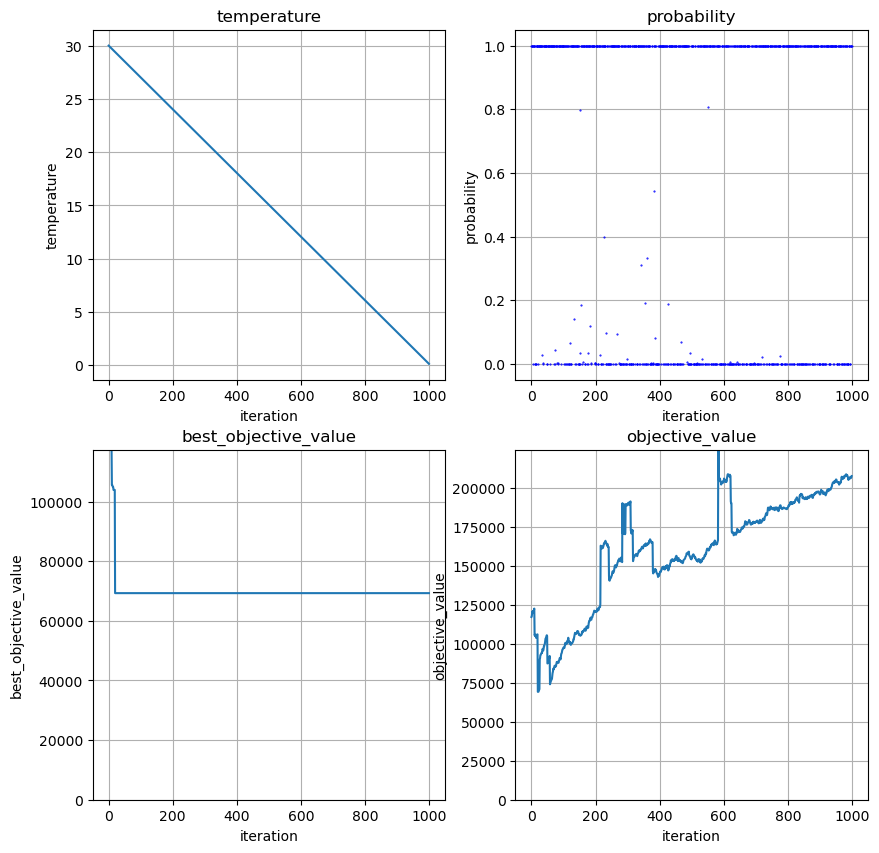

In [5]:
for _ in range(NUMBER_OF_SHOTS):
    solution, scope = solver.simulate_annealing()
vis.plot_scope(scope)

# Order1.2

In [6]:
solver.experiment_name = "test_init_sol_order1.2"
solver.init_sol = fac.generate_starting_solution(order2_db)

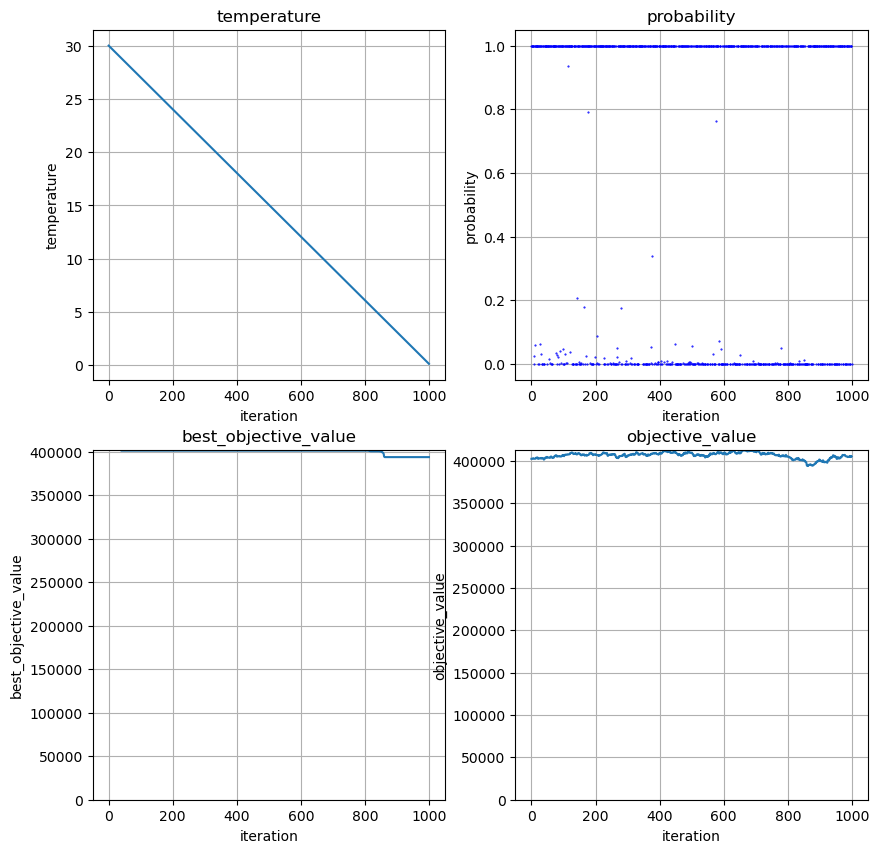

In [7]:
for _ in range(NUMBER_OF_SHOTS):
    solution, scope = solver.simulate_annealing()
vis.plot_scope(scope)

# Order1.3

In [8]:
solver.experiment_name = "test_init_sol_order1.3"
solver.init_sol = fac.generate_starting_solution(order3_db)

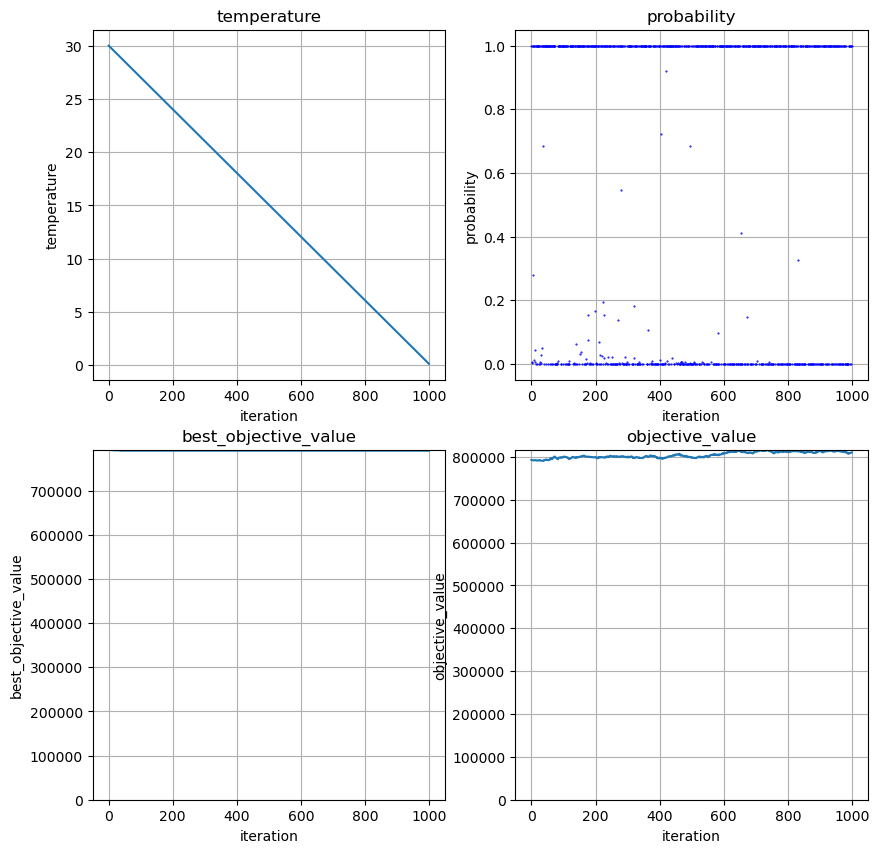

In [9]:
for _ in range(NUMBER_OF_SHOTS):
    solution, scope = solver.simulate_annealing()
vis.plot_scope(scope)